Class distribution before split:
 label
0    143
Name: count, dtype: int64
Train class distribution: label
0    114
Name: count, dtype: int64
Test class distribution: label
0    29
Name: count, dtype: int64
⚠️ Skipping RFE (only one class in y_train)
Tabular after RFE+PCA shapes: (114, 10) (29, 10)
Class counts before oversampling: Counter({0: 114})
⚠️ Only one class present in training set -> skipping oversampling
Class counts after oversampling: Counter({0: 114})


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ clinical_input (InputLayer)          │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.4375 - auc: 0.0000e+00 - loss: 0.7731
Epoch 1: val_auc improved from -inf to 0.00000, saving model to bladder_cancer_model.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.5683 - auc: 0.0000e+00 - loss: 0.6495 - val_accuracy: 0.6957 - val_auc: 0.0000e+00 - val_loss: 0.6487
Epoch 2/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8750 - auc: 0.0000e+00 - loss: 0.4869
Epoch 2: val_auc did not improve from 0.00000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8313 - auc: 0.0000e+00 - loss: 0.4711 - val_accuracy: 0.8261 - val_auc: 0.0000e+00 - val_loss: 0.5874
Epoch 3/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8750 - auc: 0.0000e+00 - loss: 0.3687
Epoch 3: val_auc did not improve from 0.00000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8815 - auc: 0.0000e+00 - loss: 0.3991 - val_accuracy: 0.9130 - val_auc: 0.0000e+00 - val_loss: 0.5303
Epoch 4/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - ac

C:\Users\91910\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


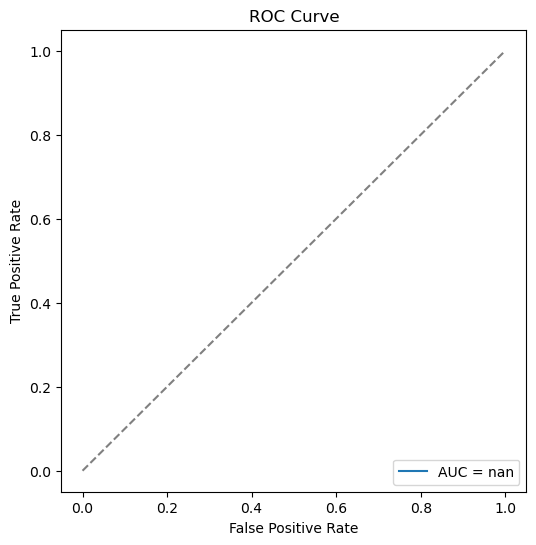

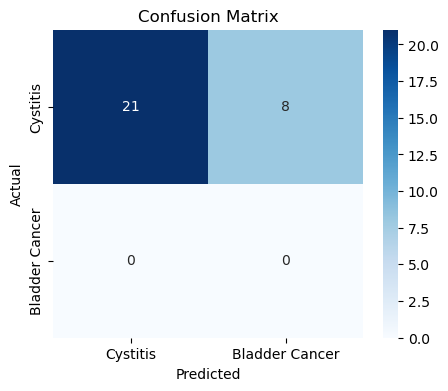

Classification Report:
                precision    recall  f1-score   support

      Cystitis       1.00      0.72      0.84        29
Bladder Cancer       0.00      0.00      0.00         0

      accuracy                           0.72        29
     macro avg       0.50      0.36      0.42        29
  weighted avg       1.00      0.72      0.84        29



C:\Users\91910\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91910\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91910\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
# ==============================
# Bladder Dataset (Tabular Only Version with Safeguards)
# ==============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ---------------------------
# Load dataset
# ---------------------------
CSV_PATH = r"C:\Users\91910\bladder.csv"
df = pd.read_csv(CSV_PATH)

# Keep only rows with Cystitis or Bladder Cancer
df = df[df["Disease"].isin(["Cystitis", "Bladder Cancer"])].copy()

# Map to binary labels
df["label"] = df["Disease"].map({"Cystitis": 0, "Bladder Cancer": 1})

# Drop non-feature columns
X = df.drop(columns=["Disease", "Patient Number", "label"])
y = df["label"]

print("Class distribution before split:\n", y.value_counts())

# ---------------------------
# Train-test split
# ---------------------------
# If minority class is too small, use smaller test size
test_size = 0.2
if y.value_counts().min() < 5:
    print("⚠️ Few minority samples detected, reducing test size to 0.1")
    test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42, stratify=y
)

print("Train class distribution:", y_train.value_counts())
print("Test class distribution:", y_test.value_counts())

# ---------------------------
# Impute missing values + Scale
# ---------------------------
imputer = SimpleImputer(strategy="median")
X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled  = scaler.transform(X_test_imp)

# ---------------------------
# Feature Selection (RFE) with safeguard
# ---------------------------
if len(np.unique(y_train)) > 1:  # Only run RFE if >1 class
    n_features_to_select = min(10, X_train_scaled.shape[1])
    rfe_est = LogisticRegression(max_iter=1000, solver="lbfgs")
    rfe = RFE(rfe_est, n_features_to_select=n_features_to_select)
    X_train_sel = rfe.fit_transform(X_train_scaled, y_train)
    X_test_sel  = rfe.transform(X_test_scaled)
else:
    print("⚠️ Skipping RFE (only one class in y_train)")
    X_train_sel, X_test_sel = X_train_scaled, X_test_scaled

# ---------------------------
# PCA
# ---------------------------
pca_components = min(10, X_train_sel.shape[1])
pca = PCA(n_components=pca_components)
X_train_pca = pca.fit_transform(X_train_sel)
X_test_pca  = pca.transform(X_test_sel)

print("Tabular after RFE+PCA shapes:", X_train_pca.shape, X_test_pca.shape)

# ---------------------------
# Handle Class Imbalance (SMOTE)
# ---------------------------
# ---------------------------
# Handle Class Imbalance (Safe)
# ---------------------------
from collections import Counter
print("Class counts before oversampling:", Counter(y_train))

if len(np.unique(y_train)) < 2:
    print("⚠️ Only one class present in training set -> skipping oversampling")
    X_res, y_res = X_train_pca, y_train
else:
    minority_count = min(Counter(y_train).values())
    if minority_count < 2:
        print("⚠️ Too few minority samples -> using RandomOverSampler")
        ros = RandomOverSampler(random_state=42)
        X_res, y_res = ros.fit_resample(X_train_pca, y_train)
    else:
        k_neighbors = min(5, minority_count - 1)
        smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
        X_res, y_res = smote.fit_resample(X_train_pca, y_train)

print("Class counts after oversampling:", Counter(y_res))


# ---------------------------
# Deep Learning Model (Tabular Only)
# ---------------------------
clinical_in = Input(shape=(X_res.shape[1],), name="clinical_input")
c = layers.Dense(64, activation="relu")(clinical_in)
c = layers.BatchNormalization()(c)
c = layers.Dense(32, activation="relu")(c)
c = layers.Dropout(0.3)(c)
out = layers.Dense(1, activation="sigmoid")(c)

model = Model(inputs=clinical_in, outputs=out)
model.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=["accuracy", tf.keras.metrics.AUC(name="auc")])

model.summary()

# ---------------------------
# Train Model
# ---------------------------
es = EarlyStopping(monitor="val_auc", mode="max", patience=6, restore_best_weights=True, verbose=1)
ckpt = ModelCheckpoint("bladder_cancer_model.keras", monitor="val_auc", mode="max", save_best_only=True, verbose=1)

history = model.fit(
    X_res, y_res,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[es, ckpt]
)

# ---------------------------
# Evaluate
# ---------------------------
loss, acc, auc_val = model.evaluate(X_test_pca, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}, Test AUC: {auc_val:.4f}")

# ---------------------------
# Predictions & Metrics
# ---------------------------
y_pred_prob = model.predict(X_test_pca).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Cystitis","Bladder Cancer"], 
            yticklabels=["Cystitis","Bladder Cancer"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Cystitis","Bladder Cancer"]))
